In [35]:
from pprint import pprint as pp
import numpy as np
from typing import Tuple, List

In [36]:
population_size = 9
chromosome_length = 80
population = []
for idx in range(100):
  individual = np.random.rand((chromosome_length))
  population.append(individual)
pp(population[0])
pp(population[0].shape)

array([0.77338045, 0.16976382, 0.97601301, 0.9244729 , 0.35606374,
       0.5518756 , 0.86716275, 0.45011881, 0.16134591, 0.42376977,
       0.8976529 , 0.48152457, 0.62792475, 0.47401199, 0.29680752,
       0.9648701 , 0.07852806, 0.43636603, 0.34460977, 0.92451033,
       0.43498647, 0.10767309, 0.88489865, 0.64570934, 0.4263439 ,
       0.16145911, 0.54212217, 0.4157031 , 0.33337453, 0.65430521,
       0.66183786, 0.73819483, 0.13381938, 0.31901301, 0.14881707,
       0.34836637, 0.86986733, 0.44311372, 0.37671748, 0.72758925,
       0.52465032, 0.84229984, 0.56784713, 0.66324155, 0.25448203,
       0.17070871, 0.33858798, 0.55327744, 0.90670727, 0.23374855,
       0.4120702 , 0.11423925, 0.08403012, 0.58067348, 0.72252401,
       0.6106954 , 0.30207541, 0.59356355, 0.23646845, 0.8074314 ,
       0.44583587, 0.33130685, 0.58375854, 0.924135  , 0.56660265,
       0.75905572, 0.67899589, 0.27715784, 0.63191065, 0.50841428,
       0.99669708, 0.72562969, 0.36332565, 0.3235843 , 0.98736

In [37]:
def get_fitness(individual: np.ndarray) -> int:
  fitness = individual - np.ones(individual.shape)
  fitness = max(10000 - ((np.sum(np.abs(individual))) ** 2), 0)
  return fitness
pp(population[0])
pp(get_fitness(population[0]))
max_fitness = get_fitness(np.ones((chromosome_length)))

array([0.77338045, 0.16976382, 0.97601301, 0.9244729 , 0.35606374,
       0.5518756 , 0.86716275, 0.45011881, 0.16134591, 0.42376977,
       0.8976529 , 0.48152457, 0.62792475, 0.47401199, 0.29680752,
       0.9648701 , 0.07852806, 0.43636603, 0.34460977, 0.92451033,
       0.43498647, 0.10767309, 0.88489865, 0.64570934, 0.4263439 ,
       0.16145911, 0.54212217, 0.4157031 , 0.33337453, 0.65430521,
       0.66183786, 0.73819483, 0.13381938, 0.31901301, 0.14881707,
       0.34836637, 0.86986733, 0.44311372, 0.37671748, 0.72758925,
       0.52465032, 0.84229984, 0.56784713, 0.66324155, 0.25448203,
       0.17070871, 0.33858798, 0.55327744, 0.90670727, 0.23374855,
       0.4120702 , 0.11423925, 0.08403012, 0.58067348, 0.72252401,
       0.6106954 , 0.30207541, 0.59356355, 0.23646845, 0.8074314 ,
       0.44583587, 0.33130685, 0.58375854, 0.924135  , 0.56660265,
       0.75905572, 0.67899589, 0.27715784, 0.63191065, 0.50841428,
       0.99669708, 0.72562969, 0.36332565, 0.3235843 , 0.98736

In [38]:
def get_pop_fitness(population: List[np.ndarray]) -> Tuple[int, float, List[int]]:
  pop_fitness = 0
  fitnesses = []
  for individual in population:
    individual_fitness = get_fitness(individual)
    pop_fitness += individual_fitness
    fitnesses.append(individual_fitness)
  average_fitness = float(pop_fitness) / float(len(population))
  return pop_fitness, average_fitness, fitnesses

pop_fit, avg_fit, fit_list = get_pop_fitness(population)
pp(pop_fit)
pp(avg_fit)
##pp(fit_list)

837916.4978848462
8379.164978848461


In [39]:
def choose_mating_pair(population: List[np.ndarray], pop_fit, fit_list) -> Tuple[int, int]:
  roulette_wheel = []
  running_total = 0
  for individual in fit_list:
    roulette_wheel.append((float(individual) / float(pop_fit)) + running_total)
    running_total += (float(individual) / float(pop_fit))
  random_num = np.random.uniform(0,1)
  s1 = 0
  for idx, individual in enumerate(roulette_wheel):
    running_total += individual
    if random_num <= running_total:
      s1 = idx
      break
  random_num = np.random.uniform(0,1)
  s2 = 0
  running_total = 0
  for idx, individual in enumerate(roulette_wheel):
    running_total += individual
    if random_num < running_total and idx != s1:
      s2 = idx
      break
  return s1, s2
c1, c2 = choose_mating_pair(population, pop_fit, fit_list)
pp(c1)
pp(c2)
pp(population[c1])
pp(population[c2])

0
8
array([0.77338045, 0.16976382, 0.97601301, 0.9244729 , 0.35606374,
       0.5518756 , 0.86716275, 0.45011881, 0.16134591, 0.42376977,
       0.8976529 , 0.48152457, 0.62792475, 0.47401199, 0.29680752,
       0.9648701 , 0.07852806, 0.43636603, 0.34460977, 0.92451033,
       0.43498647, 0.10767309, 0.88489865, 0.64570934, 0.4263439 ,
       0.16145911, 0.54212217, 0.4157031 , 0.33337453, 0.65430521,
       0.66183786, 0.73819483, 0.13381938, 0.31901301, 0.14881707,
       0.34836637, 0.86986733, 0.44311372, 0.37671748, 0.72758925,
       0.52465032, 0.84229984, 0.56784713, 0.66324155, 0.25448203,
       0.17070871, 0.33858798, 0.55327744, 0.90670727, 0.23374855,
       0.4120702 , 0.11423925, 0.08403012, 0.58067348, 0.72252401,
       0.6106954 , 0.30207541, 0.59356355, 0.23646845, 0.8074314 ,
       0.44583587, 0.33130685, 0.58375854, 0.924135  , 0.56660265,
       0.75905572, 0.67899589, 0.27715784, 0.63191065, 0.50841428,
       0.99669708, 0.72562969, 0.36332565, 0.3235843 , 0.9

In [40]:
def crossover(population: List[np.ndarray], c1: int, c2: int, crossover_prob: float = 0.7) -> List[np.ndarray]:
  child1 = population[c1].copy()
  child2 = population[c2].copy()
  rand_num = np.random.rand()
  if rand_num > crossover_prob:
    return [child1, child2]
  crossover_point = np.random.randint(0, population[0].shape[0])
  ##Fancy Non-Destructive Slicing Replacement
  child1[crossover_point:] = population[c2].copy()[crossover_point:] 
  child2[crossover_point:] = population[c1].copy()[crossover_point:]
  return [child1, child2]

children = crossover(population, c1, c2)
pp(children)

[array([0.77338045, 0.16976382, 0.97601301, 0.9244729 , 0.35606374,
       0.5518756 , 0.86716275, 0.45011881, 0.16134591, 0.52250897,
       0.08465156, 0.18037348, 0.97230497, 0.54374272, 0.24777206,
       0.97545464, 0.78551673, 0.23257771, 0.4136111 , 0.98116336,
       0.78646791, 0.98106939, 0.63676734, 0.55343439, 0.81557668,
       0.47364784, 0.09323459, 0.33824885, 0.97672756, 0.32101688,
       0.85643981, 0.69978396, 0.76360742, 0.63360983, 0.81443675,
       0.6233408 , 0.65457133, 0.36814402, 0.8468854 , 0.20024172,
       0.74153224, 0.47342993, 0.57582952, 0.1080386 , 0.04580684,
       0.4117234 , 0.82684953, 0.46707094, 0.47130645, 0.21502087,
       0.50587779, 0.25327825, 0.19337444, 0.16443963, 0.25598332,
       0.69824672, 0.71599592, 0.48885406, 0.72075138, 0.68136394,
       0.61214569, 0.96796791, 0.39136057, 0.02620376, 0.55679492,
       0.93472802, 0.96978265, 0.40678148, 0.22949912, 0.52911066,
       0.56586637, 0.35348586, 0.36489941, 0.51348045, 0.5104

In [41]:
def crossover_population(population: List[np.ndarray], pop_fit: int, fit_list: List[int], crossover_prob: float = 0.7) -> List[np.ndarray]:
    new_population = []
    for idx in range(int(len(population) / 2)):
        parent1, parent2 = choose_mating_pair(population, pop_fit, fit_list)
        children = crossover(population, parent1, parent2, crossover_prob)
        new_population.extend(children)
    if int(len(population)) % 2 != 0:
        parent1, parent2 = choose_mating_pair(population, pop_fit, fit_list)
        children = crossover(population, parent1, parent2, crossover_prob)
        new_population.append(children[0])
    return new_population
new_population = crossover_population(population, pop_fit, fit_list)
pp(len(new_population))
pp(new_population[0])

100
array([0.77338045, 0.16976382, 0.97601301, 0.9244729 , 0.35606374,
       0.5518756 , 0.86716275, 0.45011881, 0.16134591, 0.42376977,
       0.8976529 , 0.48152457, 0.62792475, 0.47401199, 0.29680752,
       0.9648701 , 0.07852806, 0.43636603, 0.34460977, 0.92451033,
       0.43498647, 0.10767309, 0.88489865, 0.64570934, 0.4263439 ,
       0.16145911, 0.54212217, 0.4157031 , 0.33337453, 0.65430521,
       0.66183786, 0.73819483, 0.13381938, 0.31901301, 0.14881707,
       0.34836637, 0.86986733, 0.44311372, 0.37671748, 0.72758925,
       0.52465032, 0.84229984, 0.56784713, 0.66324155, 0.25448203,
       0.17070871, 0.33858798, 0.55327744, 0.90670727, 0.23374855,
       0.4120702 , 0.11423925, 0.08403012, 0.58067348, 0.72252401,
       0.6106954 , 0.30207541, 0.59356355, 0.23646845, 0.8074314 ,
       0.44583587, 0.33130685, 0.58375854, 0.924135  , 0.56660265,
       0.75905572, 0.67899589, 0.27715784, 0.63191065, 0.50841428,
       0.99669708, 0.72562969, 0.36332565, 0.3235843 , 0.9

In [42]:
def mutate(individual: np.ndarray, mutation_prob: float = 0.1, variance: float = 0.5) -> np.ndarray:
  rand_num = np.random.rand()
  if rand_num > mutation_prob:
    return individual
  mutation_point = np.random.randint(0, individual.shape[0])
  individual[mutation_point] = min(max(np.random.randn() * individual[mutation_point] * variance + individual[mutation_point], 0), 1)
  return individual

mutant = mutate(children[0])
pp(mutant)

array([0.77338045, 0.16976382, 0.97601301, 0.9244729 , 0.35606374,
       0.5518756 , 0.86716275, 0.45011881, 0.16134591, 0.52250897,
       0.08465156, 0.18037348, 0.97230497, 0.54374272, 0.24777206,
       0.97545464, 0.78551673, 0.23257771, 0.4136111 , 0.98116336,
       0.78646791, 0.98106939, 0.63676734, 0.55343439, 0.81557668,
       0.47364784, 0.09323459, 0.33824885, 0.97672756, 0.32101688,
       0.85643981, 0.69978396, 0.76360742, 0.63360983, 0.81443675,
       0.6233408 , 0.65457133, 0.36814402, 0.8468854 , 0.20024172,
       0.74153224, 0.47342993, 0.57582952, 0.1080386 , 0.04580684,
       0.4117234 , 0.82684953, 0.46707094, 0.47130645, 0.21502087,
       0.50587779, 0.25327825, 0.19337444, 0.16443963, 0.25598332,
       0.69824672, 0.71599592, 0.48885406, 0.72075138, 0.68136394,
       0.61214569, 0.96796791, 0.39136057, 0.02620376, 0.55679492,
       0.93472802, 0.96978265, 0.40678148, 0.22949912, 0.52911066,
       0.56586637, 0.35348586, 0.36489941, 0.51348045, 0.51047

In [43]:
def mutate_population(population: List[np.ndarray], mutation_prob: float = 0.1) -> List[np.ndarray]:
  mutated_population = []
  for individual in population:
    mutated_population.append(mutate(individual, mutation_prob))
  return mutated_population
pp(mutate_population(population, mutation_prob=0.01)[0])

array([0.77338045, 0.16976382, 0.97601301, 0.9244729 , 0.35606374,
       0.5518756 , 0.86716275, 0.45011881, 0.16134591, 0.42376977,
       0.8976529 , 0.48152457, 0.62792475, 0.47401199, 0.29680752,
       0.9648701 , 0.07852806, 0.43636603, 0.34460977, 0.92451033,
       0.43498647, 0.10767309, 0.88489865, 0.64570934, 0.4263439 ,
       0.16145911, 0.54212217, 0.4157031 , 0.33337453, 0.65430521,
       0.66183786, 0.73819483, 0.13381938, 0.31901301, 0.14881707,
       0.34836637, 0.86986733, 0.44311372, 0.37671748, 0.72758925,
       0.52465032, 0.84229984, 0.56784713, 0.66324155, 0.25448203,
       0.17070871, 0.33858798, 0.55327744, 0.90670727, 0.23374855,
       0.4120702 , 0.11423925, 0.08403012, 0.58067348, 0.72252401,
       0.6106954 , 0.30207541, 0.59356355, 0.23646845, 0.8074314 ,
       0.44583587, 0.33130685, 0.58375854, 0.924135  , 0.56660265,
       0.75905572, 0.67899589, 0.27715784, 0.63191065, 0.50841428,
       0.99669708, 0.72562969, 0.36332565, 0.3235843 , 0.98736

In [44]:
kings = []
average_fitnesses = []
max_fitnesses = []
king_streak = 0
total_evolutions = 0
streaks = []

In [45]:
evolutions = 1000
for idx in range(evolutions):
    pop_fit, avg_fit, fit_list = get_pop_fitness(population)
    pop_max = max(fit_list)

    ## Logging
    average_fitnesses.append(avg_fit)
    max_fitnesses.append(pop_max)

    ## Check for solution
    if pop_max == max_fitness:
        print(f'Solution found in {total_evolutions} evolutions!')
        break

    ## Find the King
    pop_king = population[fit_list.index(pop_max)].copy()
    ## This preserves the King's rule if there is a tie
    if idx != 0 and fit_list.count(pop_max) > 1 and pop_max == get_fitness(kings[-1]):
        pop_king = kings[-1].copy()

    ## Tally the King's streak
    if idx != 0 and np.array_equal(pop_king, kings[-1]):
        king_streak += 1
    else:
        king_streak = 0
    streaks.append(king_streak)
    kings.append(pop_king)

    ## Actually do some evolution
    population = crossover_population(population, pop_fit, fit_list)
    population = mutate_population(population, mutation_prob=0.05)
    
    ## Preserve the king
    population = [pop_king] + population[:-1]

    total_evolutions += 1
    print(f"Evolution {total_evolutions}: Avg: {avg_fit} Max: {pop_max} King Streak: {king_streak}")  


Evolution 1: Avg: 8379.186752805354 Max: 8857.707328553146 King Streak: 0
Evolution 2: Avg: 8363.74621604993 Max: 8857.707328553146 King Streak: 1
Evolution 3: Avg: 8602.325104700105 Max: 8937.164992062244 King Streak: 0
Evolution 4: Avg: 8728.912042721382 Max: 8937.164992062244 King Streak: 1
Evolution 5: Avg: 8831.420277154211 Max: 9005.512529016592 King Streak: 0
Evolution 6: Avg: 8908.949802798466 Max: 9005.512529016592 King Streak: 1
Evolution 7: Avg: 8959.807475675563 Max: 9082.551693027866 King Streak: 0
Evolution 8: Avg: 8995.130334906573 Max: 9082.551693027866 King Streak: 1
Evolution 9: Avg: 9035.071391613677 Max: 9082.551693027866 King Streak: 2
Evolution 10: Avg: 9059.875235196663 Max: 9082.551693027866 King Streak: 3
Evolution 11: Avg: 9077.491698090982 Max: 9085.59093370758 King Streak: 0
Evolution 12: Avg: 9081.369576480238 Max: 9105.582945225948 King Streak: 0
Evolution 13: Avg: 9084.347548224749 Max: 9105.582945225948 King Streak: 1
Evolution 14: Avg: 9094.341599967009

When the max fitness is 128 the King is the solution answer

In [46]:
pp(kings[-1])
pp(average_fitnesses[-1])
pp(population[30])

array([0.00000000e+00, 3.33986701e-04, 1.78885021e-03, 8.92445116e-04,
       0.00000000e+00, 1.00277435e-03, 1.95989425e-04, 1.26139078e-05,
       0.00000000e+00, 1.17182681e-03, 1.15046562e-03, 4.37977468e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.89224992e-03, 6.43566261e-04, 1.55004672e-05, 0.00000000e+00,
       2.21682782e-03, 4.59517221e-05, 0.00000000e+00, 2.99908465e-04,
       6.53738547e-04, 2.38954835e-04, 0.00000000e+00, 2.48206073e-03,
       7.31727151e-04, 0.00000000e+00, 0.00000000e+00, 2.04174199e-04,
       1.36315671e-03, 0.00000000e+00, 1.17395323e-03, 0.00000000e+00,
       8.99469418e-04, 0.00000000e+00, 0.00000000e+00, 4.54710205e-04,
       0.00000000e+00, 3.90153085e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.67850167e-04, 0.00000000e+00, 2.35025543e-03,
       0.00000000e+00, 4.96710409e-04, 0.00000000e+00, 0.00000000e+00,
       2.97525455e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

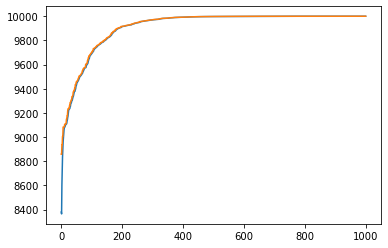

In [47]:
from matplotlib import pyplot as plt

plt.plot(average_fitnesses)
plt.plot(max_fitnesses)

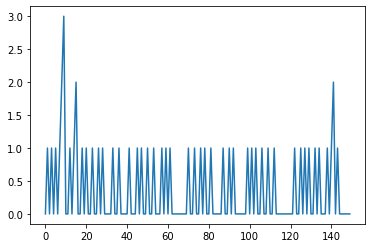

In [48]:
plt.plot(streaks[:150])